In [ ]:
!unzip '/content/drive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/548681_1157383_bundle_archive.zip'

In [ ]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt

In [ ]:
dataset_path = './dataset'

In [ ]:
%%bash
rm -rf dataset
rm -rf dataset/train/covid/
rm -rf dataset/train/normal/
rm -rf dataset/test/covid
rm -rf dataset/test/normal
mkdir -p dataset/train/covid
mkdir -p dataset/train/normal
mkdir -p dataset/test/covid
mkdir -p dataset/test/normal


In [ ]:
samples = 20

In [ ]:
covid_dataset_path = './images'

In [ ]:
df = pd.read_csv("metadata.csv")
print(df['finding'].value_counts())
print(os.path)

COVID-19          296
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64
<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>


In [ ]:
# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([f"{covid_dataset_path}", row["filename"]])
    print(imagePath)

    #if not os.path.exists(imagePath):
    #    continue
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["finding"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/train/covid", row["filename"]])
    print(outputPath)
    # copy the image
    shutil.copy2(imagePath, outputPath)

./images/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./images/nejmc2001573_f1a.jpeg
./dataset/train/covid/nejmc2001573_f1a.jpeg
./images/nejmc2001573_f1b.jpeg
./dataset/train/covid/nejmc2001573_f1b.jpeg
./images/lancet-case2a.jpg
./dataset/train/covid/lancet-case2a.jpg
./images/lancet-case2b.jpg
./dataset/train/covid/lancet-case2b.jpg
./images/1-s2.0-S0140673

In [76]:
# loop over the rows of the Normal data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] == "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([f"{covid_dataset_path}", row["filename"]])
    print(imagePath)

    #if not os.path.exists(imagePath):
    #    continue
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["finding"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/train/normal", row["filename"]])
    print(outputPath)
    # copy the image
    shutil.copy2(imagePath, outputPath)

./images/ARDSSevere.png
./dataset/train/normal/ARDSSevere.png
./images/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
./images/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
./dataset/train/normal/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
./images/acute-respiratory-distress-syndrome-ards-1.jpg
./dataset/train/normal/acute-respiratory-distress-syndrome-ards-1.jpg
./images/acute-respiratory-distress-syndrome-ards.jpg
./dataset/train/normal/acute-respiratory-distress-syndrome-ards.jpg
./images/ards-secondary-to-tiger-snake-bite.png
./dataset/train/normal/ards-secondary-to-tiger-snake-bite.png
./images/pneumocystis-pneumonia-2-PA.png
./dataset/train/normal/pneumocystis-pneumonia-2-PA.png
./images/streptococcus-pneumoniae-pneumonia-1.jpg
./dataset/train/norm

Moving a part of the training dataset to the test dataset

In [77]:
basePath = './dataset/train/normal'
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    print(imagePath)
    if os.path.exists(imagePath):
      filename = imagePath.split(os.path.sep)[-1]
      outputPath = os.path.sep.join([f"{dataset_path}/test/normal", filename])

      # cut the image
      shutil.move(imagePath, outputPath)

./dataset/train/normal/pneumocystis-jiroveci-pneumonia-2.png
./dataset/train/normal/wong-0002.jpg
./dataset/train/normal/pneumocystis-jiroveci-pneumonia-4-PA.png
./dataset/train/normal/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg
./dataset/train/normal/wong-0000.jpg
./dataset/train/normal/legionella-pneumonia-1.png
./dataset/train/normal/pneumocystis-jirovecii-pneumonia-2.jpg
./dataset/train/normal/klebsiella-pneumonia-1.jpg
./dataset/train/normal/pneumococcal-pneumonia-day7.jpg
./dataset/train/normal/covid-19-pneumonia-rapidly-progressive-3-days.jpg
./dataset/train/normal/pneumonia-7.jpg
./dataset/train/normal/ards-secondary-to-tiger-snake-bite.png
./dataset/train/normal/pneumococcal-pneumonia-day35.jpg
./dataset/train/normal/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-1.jpg
./dataset/train/normal/pneumocystis-jirovecii-pneumonia-3-1.jpg
./dataset/train/normal/pneumocystis-jirovecii-pneumonia-3-2.jpg
./dataset/train/normal/ryct.2020003

In [ ]:
basePath = './dataset/train/covid'
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    print(imagePath)
    if os.path.exists(imagePath):
      filename = imagePath.split(os.path.sep)[-1]
      outputPath = os.path.sep.join([f"{dataset_path}/test/covid", filename])

      # cut the image
      shutil.move(imagePath, outputPath)

./dataset/train/covid/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg
./dataset/train/covid/figure1-5e75d0940b71e1b702629659-98-right.jpeg
./dataset/train/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/80446565-E090-4187-A031-9D3CEAA586C8.jpeg
./dataset/train/covid/kjr-21-e24-g003-l-a.jpg
./dataset/train/covid/covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg
./dataset/train/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
./dataset/train/covid/covid-19-pneumonia-58-day-3.jpg
./dataset/train/covid/F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg
./dataset/train/covid/7-fatal-covid19.jpg
./dataset/train/covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png
./dataset/train/covid/16654_2_1.jpg
./dataset/train/covid/kjr-21-e24-g001-l-a.jpg
./dataset/train/covid/radiol.2020200490.fig3.jpeg
./dataset/train/covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png
./dataset/train/covid/1B734A89-A1BF-

In [ ]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

121 20
36 40


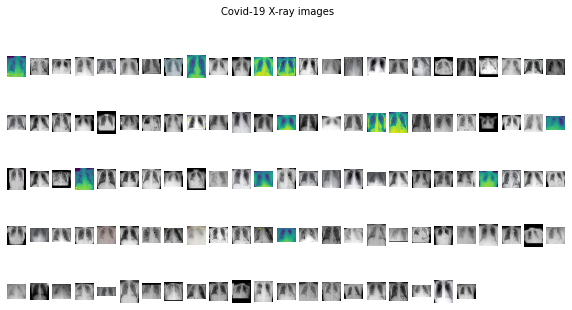

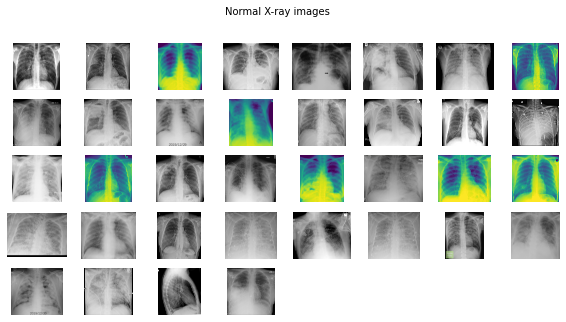

In [78]:
from imutils import paths
covid_images = list(paths.list_images(f"{dataset_path}/train/covid"))
normal_images = list(paths.list_images(f"{dataset_path}/train/normal"))
covid_test_images = list(paths.list_images(f"{dataset_path}/test/covid"))
normal_test_images = list(paths.list_images(f"{dataset_path}/test/normal"))
print(len(covid_images), len(covid_test_images))
print(len(normal_images), len(normal_test_images))
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

Importing the libraries

In [119]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

Preprocessing the tarining directory and Validation directory

In [138]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 157 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Building the CNN 

In [139]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=[150,150,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Building the VGG19 Model

In [145]:
basemodel = tf.keras.applications.VGG19(
    include_top=True,
    weights=None,
    input_tensor=tf.keras.layers.Input(shape=(150,150,3)),
    input_shape=(150, 150, 3),
    pooling=None,
    classes = 2,
    classifier_activation="softmax",
)

In [131]:
class MyCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.80 :
      print("\n Recahed accuracy above 77% ")
      self.model.stop_training = True

Fitting your VGG19 Model

In [146]:
basemodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = basemodel.fit(x=train_generator, validation_data=validation_generator, epochs=5, callbacks=[MyCallback()])

Epoch 1/5
5/5 [==============================] - 155s 31s/step - loss: 0.6932 - acc: 0.5732 - val_loss: 0.6932 - val_acc: 0.3333
Epoch 2/5
5/5 [==============================] - 156s 31s/step - loss: 0.6932 - acc: 0.5541 - val_loss: 0.6931 - val_acc: 0.3333
Epoch 3/5
5/5 [==============================] - 153s 31s/step - loss: 0.6931 - acc: 0.5987 - val_loss: 0.6931 - val_acc: 0.6667
Epoch 4/5
5/5 [==============================] - 157s 31s/step - loss: 0.6931 - acc: 0.4204 - val_loss: 0.6931 - val_acc: 0.3333
Epoch 5/5
5/5 [==============================] - 152s 30s/step - loss: 0.6931 - acc: 0.5669 - val_loss: 0.6931 - val_acc: 0.3333


Fitting your Model

In [150]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist_model = model.fit(x=train_generator, validation_data=validation_generator, epochs=5, callbacks=[MyCallback()])

Epoch 1/5
5/5 [==============================] - 16s 3s/step - loss: 0.6604 - acc: 0.7707 - val_loss: 0.9493 - val_acc: 0.3333
Epoch 2/5
5/5 [==============================] - 15s 3s/step - loss: 0.6065 - acc: 0.7707 - val_loss: 0.8854 - val_acc: 0.3333
Epoch 3/5
5/5 [==============================] - 15s 3s/step - loss: 0.5705 - acc: 0.7707 - val_loss: 1.2088 - val_acc: 0.3333
Epoch 4/5
5/5 [==============================] - 16s 3s/step - loss: 0.5486 - acc: 0.7707 - val_loss: 0.9375 - val_acc: 0.3333
Epoch 5/5
5/5 [==============================] - 15s 3s/step - loss: 0.5477 - acc: 0.7707 - val_loss: 1.0602 - val_acc: 0.3333


Testing on a single image

In [148]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/dataset/test/normal/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg', target_size=(150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 0:
  print("Covid")
else:
  print("Normal")

Normal


Visualizing the accuracy curve of the VGG19 Model

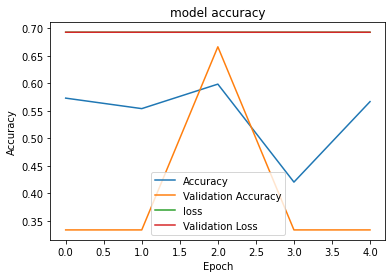

In [149]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Visualizing the Simple CNN Model's accuracy curve

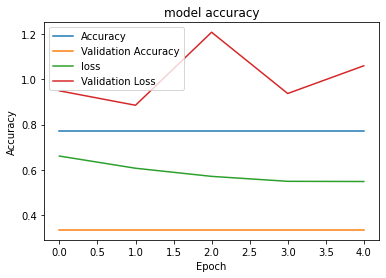

In [152]:
plt.plot(hist_model.history["acc"])
plt.plot(hist_model.history['val_acc'])
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()